# Life Expectancy and GDP

## Introduction

The conomical health gap of countries varies enormously between countries around the world. A common way to mesure this economical health is by looking at the gross domestic product* or GDP of the country. the [GDP](https://www.investopedia.com/terms/g/gdp.asp) refers to the market value of the finished goods and services produced inside a country's borders. In other words, a country who produces and a lot and ecxports these productions will have a higher GDP than a country who depends on other countries by importing a lot of products. By looking at statistics for 2017, it was interpreted that The United States was a the top of the list with a GDP of over 19 Trillion dollars while Tuvalu was at the bottom of the list with a GDP of barely over 40 million which shows a very big gap.

The goal of this project was to delve deeper in the study of GDP of certain countries by visualising its progression through the years and comparing it to other countries. At the end, we take a look at the correlation between the GDP of a country and the Life expectancy at birth of that same country. More precisely, these following questions will be answered.
- Has the GDP of the different countries increased or decreased over time?
- Has the life expectancy of the different countries increased or decreased over time?
- Which country holds the highest average GDP? Which country holds the lowest?
- What is the distribution of these two variables between the countries?
- Is there a correlation between the variables?

To answer these questions, data on 6 countries has been provided. Each Country has data on their Life Expectancy at Birth and on their GDP over the years 2000 to 2015. The 6 countries that will be analyzed are Chile, China, Germany, Mexico, United States of America and Zimbabwe

## Contents

- #### Importing the modules and the data
- #### Exploring the Data
- #### Cleaning the Data
- #### Visualizing the Data
    - ##### Life Expectancy at Birth Through the Years
    - ##### GDP Through the years
    - ##### Distribution of GDP and Life Expectancy
    - ##### Correlation between GDP and Life expectancy
- #### Conclusion

## Importing the Modules and the data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploring the data

Lets start by getting some basics insight on the data. First, we look at the different columns, their names, their types and their contents.

In [30]:
print("Columns: \n{}".format(data.columns))
print('\n')
data.info()
print('\n')

Columns: 
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB




In [31]:
print("Countries: {}".format(data.Country.unique()))
print('\n')
print("Years: {}".format(data.Year.unique()))

Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [32]:
countries = data["Country"].unique()

for country in countries:
    country_years = data.loc[data["Country"] == country]["Year"].values
    print(country)
    print(country_years)
    print('\n')

Chile
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


China
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Germany
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Mexico
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


United States of America
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Zimbabwe
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]




As shown above, the data is already relatively clean. There are 96 rows in the dataframe and each column has 96 non-null values in them meaning that there is no missing data. Also, each column already has their respective types meaning that the 'Country' column contains strings, which is expected. Also each numerical columns coontain either int64 or float64 which is also expected. Therefore, there isn't much to do in terms of cleaning the data. Finally each country has data from 2000-2015, as shown in the output above.

There is, however, a couple of factors that would need to be treated to faciitate the analysis. For example, the `Life Expectancy at birth (years)` column name would need to be shortened. Also the Country `United States of America` could be shortened to something in the likes of `USA`.

## Cleaning the Data

In [107]:
#### Start by renaming the columns have all of them in lower case
data.rename(
    columns={
        "Country": "country",
        "Year": "year",
        "Life expectancy at birth (years)": "leaby",
        "GDP": "gdp"
        },
    inplace=True
)
#### Change United States of America -> USA

data.replace("United States of America", "USA", inplace=True)
print(data.loc[data["country"] == "USA"])

   country  year  leaby           gdp
64     USA  2000   76.8  1.030000e+13
65     USA  2001   76.9  1.060000e+13
66     USA  2002   77.0  1.100000e+13
67     USA  2003   77.2  1.150000e+13
68     USA  2004   77.5  1.230000e+13
69     USA  2005   77.5  1.310000e+13
70     USA  2006   77.8  1.390000e+13
71     USA  2007   78.1  1.450000e+13
72     USA  2008   78.2  1.470000e+13
73     USA  2009   78.5  1.440000e+13
74     USA  2010   78.7  1.500000e+13
75     USA  2011   78.7  1.550000e+13
76     USA  2012   78.8  1.620000e+13
77     USA  2013   78.9  1.670000e+13
78     USA  2014   79.1  1.740000e+13
79     USA  2015   79.3  1.810000e+13


## Visualizing the Data

In [51]:
#### Choose styling for seaborn plots
sns.set_palette('deep')
sns.set_style('whitegrid')

### Average GDP per Country

Lets start by taking a look at the average GDP by country over the years 2000-2015. We start by plotting the results as a bar chart, then we display them in tabular format.

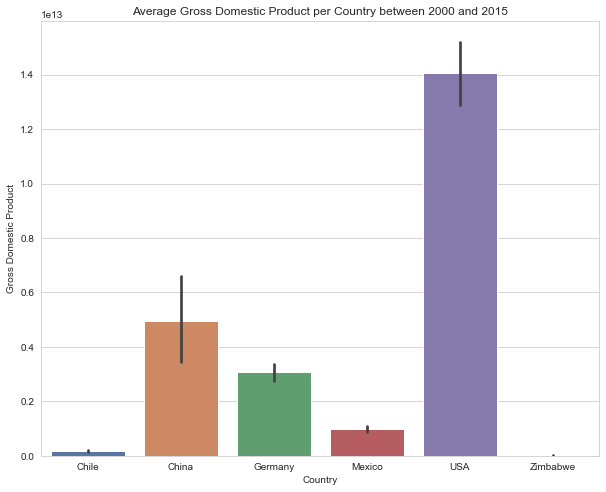

,country,Average GDP
4,USA,1.407500e+13
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
0,Chile,1.697888e+11
5,Zimbabwe,9.062580e+09


In [105]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=data, x="country", y="gdp")
plt.title("Average Gross Domestic Product per Country between 2000 and 2015")
plt.xlabel("Country")
plt.ylabel("Gross Domestic Product")
plt.show()

#Display in Dataframe format
df = data.groupby('country').gdp.mean() \
    .reset_index(name="Average GDP")\
    .sort_values("Average GDP",ascending=False)
df

It is possible to see that there is a noticeable difference in the average GDP per country over the years 2000-2015. The United States of America stands in a clear first place with an average GDP of 14 Trillion dollars, while China falls in second place with an average of a little under 1.5 trillion dollars. At the bottom of the list, Zimbabwe has an average of just over 9 billion dollars. This represents a total gap of a factor of approximately 1000 dollars.

### Average Life Expectancy per country

Continuing  with the average Life Expectancy from 2000-2015 for each analyzed country. This average is plotted in the bar graph below. The same data is displayed in table format afterwards.

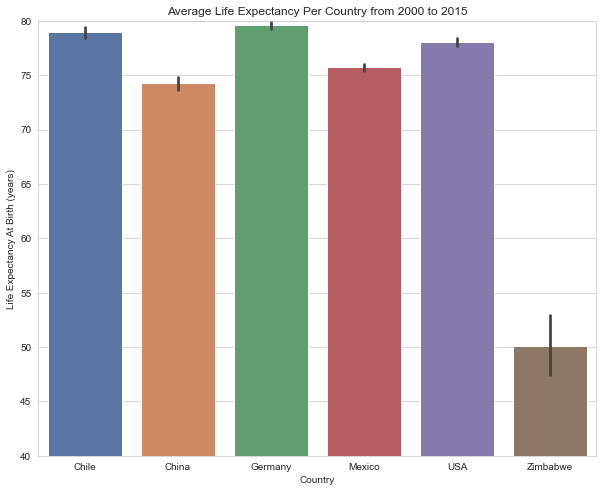

,country,Average Life Expectancy
2,Germany,79.65625
0,Chile,78.94375
4,USA,78.06250
3,Mexico,75.71875
1,China,74.26250
5,Zimbabwe,50.09375


In [106]:
# plot the bar graph
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=data, x="country", y="leaby")
plt.title("Average Life Expectancy Per Country from 2000 to 2015")
plt.xlabel("Country")
plt.ylabel("Life Expectancy At Birth (years)")

ax.set_ylim(40, 80)
plt.show()

#Display in Dataframe format
df = data.groupby('country').leaby.mean() \
    .reset_index(name="Average Life Expectancy")\
    .sort_values("Average Life Expectancy",ascending=False)
df

It is possible to see that, other than Zimbabwe, the countries are very similar in terms of average life expectancy. In fact, they all vary between around 74 years old to around 79 years old. Zimbabwe, however, has the lowest life expectancy of all with a mean of 50 years old. The long error bar also shows that this can go as low as 47 years old, which is a little more than half all the other countries life expectancies.

Looking back at the graph representing the average GDP, which was very dispersed between the countries, the plot above seems to show relatively condensed results. So, even if the GDP of the various contries was very different, the life expectancy in these same countries seem to all be condensed around 75 years old.

### Distributions

Now that the averages are known, lets take a look at the distribution of the data. For both categories (GDP and Life expectancy) a histogram is plotted first representing all the countries combined, then violin plots are plotted to get a better understanding of outliers, median and interquartile-range.

#### GDP

<Figure size 720x576 with 0 Axes>

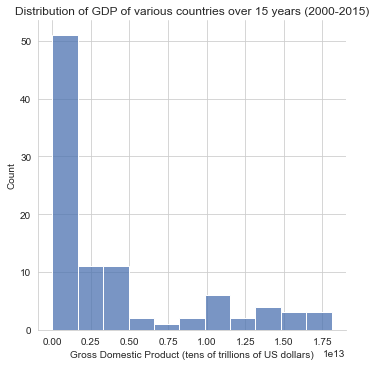

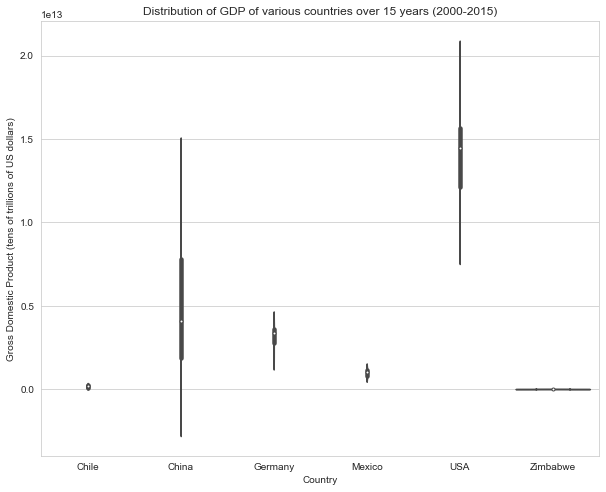

In [110]:
plt.figure(figsize=(10, 8))
sns.displot(data=data, x='gdp')
plt.title("Distribution of GDP of various countries over 15 years (2000-2015)")
plt.xlabel("Gross Domestic Product (tens of trillions of US dollars)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='country', y='gdp')
plt.title("Distribution of GDP of various countries over 15 years (2000-2015)")
plt.xlabel("Country")
plt.ylabel("Gross Domestic Product (tens of trillions of US dollars)")
plt.show()

The plots above show that the GDP is very concentrated around thebeginning of the x-axis. In other words, the mean is to the left of the median meaning that the distribution is left-skewed.

By Looking at the violin plots above, it is possible to better understand the distribution of each individual country. In fact China and the United States have a very wide distribution meaning that the GDP changed a lot over time. We cannot say, yet, that the GDP increased or decreased however. For Chile, Germany, Mexico and Zimbabwe, the distributions are a lot less wide showing more condensed data.

#### Life Expectancy at Birth

<Figure size 720x576 with 0 Axes>

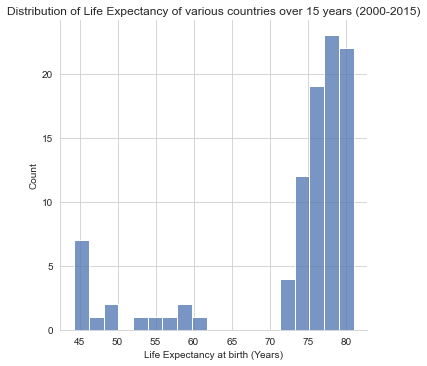

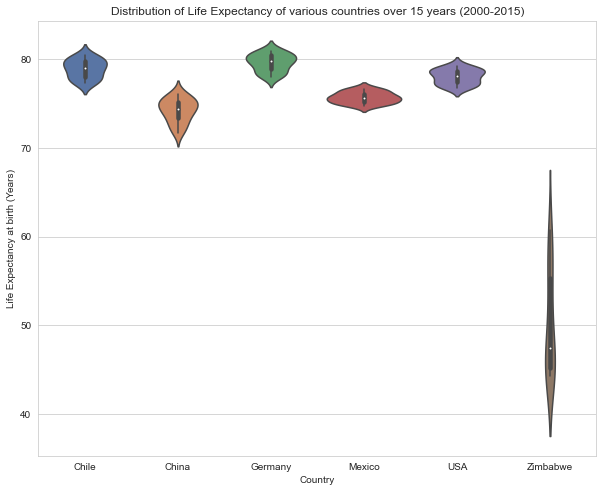

In [111]:
plt.figure(figsize=(10, 8))
sns.displot(data=data, x='leaby')
plt.title("Distribution of Life Expectancy of various countries over 15 years (2000-2015)")
plt.xlabel("Life Expectancy at birth (Years)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 8))
sns.violinplot(data=data, x='country', y='leaby')
plt.title("Distribution of Life Expectancy of various countries over 15 years (2000-2015)")
plt.xlabel("Country")
plt.ylabel("Life Expectancy at birth (Years)")
plt.show()

According to the histogram, the life expectancy is right skewed. This means that the median is lower than the mean.

When looking at the violin plots, it is possible to see that the distributions are fairly concentrated to the top of the y-axis. However, Zimbabwe has the lowest life expectancy, but also the longest distribution. This means, that contrairly to the other countrie, Zimbabwe has a life expectancy ranging from around 47 years old to 67 years old.

### Variance of GDP and Life expectancy over time

#### GDP Versus Years

To analyze GDP over years, we first start by plotting a line plot with all the countries compared to the same axis. This way, we can compare the evolution of each country between them. Afterwards, to make for better analysis, we will look at each country individually.

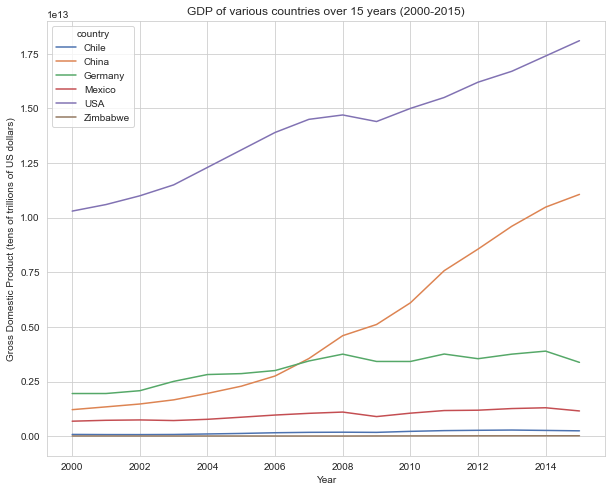

<Figure size 432x288 with 0 Axes>

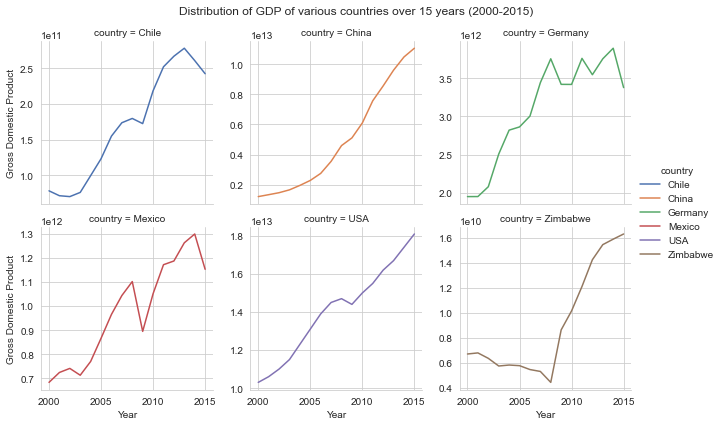

In [117]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x="year", y="gdp", hue='country')
plt.title("GDP of various countries over 15 years (2000-2015)")
plt.xlabel("Year")
plt.ylabel("Gross Domestic Product (tens of trillions of US dollars)")
plt.show()

plt.figure()
graph = sns.FacetGrid(
    data=data,
    col_wrap=3,
    col='country',
    hue='country',
    sharey=False,
    legend_out=True,
    )

graph = (graph.map(sns.lineplot,"year","gdp")
         .add_legend()
         .set_axis_labels("Year","Gross Domestic Product")
        )

plt.subplots_adjust(top=0.9)
graph.fig.suptitle("Distribution of GDP of various countries over 15 years (2000-2015)")
plt.show()

The First line graph is useful to compare the countries between them. It clearly demonstrate that China and the United States of America have had a steady increase in GDP over the years. China even surpassed Germany. China has had the biggest increase of all the countries over this time period.

The second plot, on the other hand, focuses on each country individually. It allows us to see information that was previously hidden by the first plot. In fact, it is possible to see that all the countries have had general increases in GDP over these 15 years. In Mexico, there was a considerable drop in GDP around 2010, while in Zimababwe, the results show that in the early 200s, the GDP was actually dropping. However, around 2006-2007, the country managed to bring it back up. With the second plot, we can better visualize China's GDP increase. The curve looks almost exponential.

#### Life Expectancy at Birth Versus Years

We will adopt the same strategy as for the GDP over the years to visualize the life expectancy over the years. WE first start by plotting all the countries in one graph, than we will take a look at each of them individually

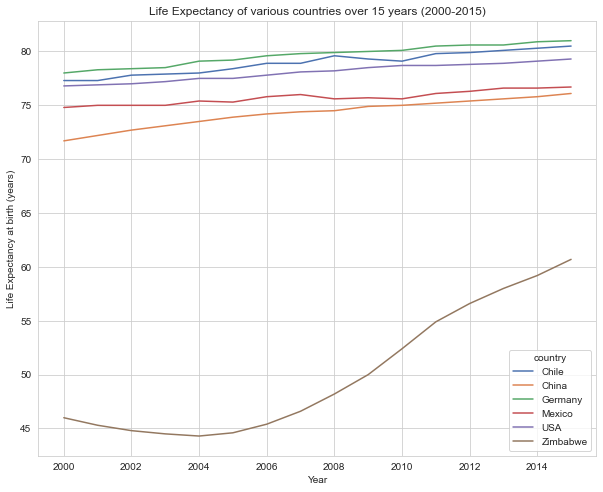

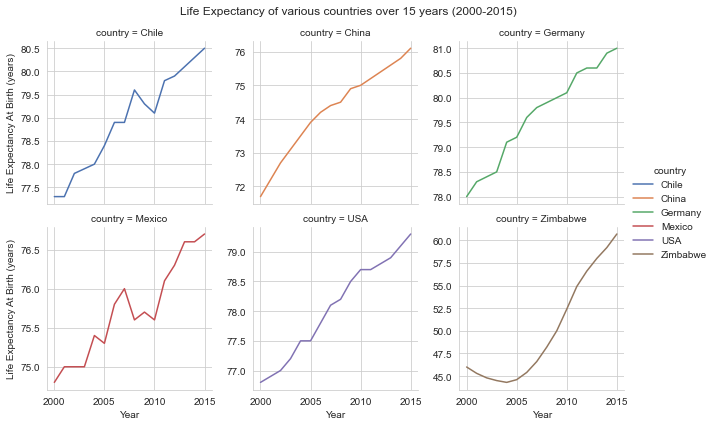

In [119]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x="year", y="leaby", hue="country")
plt.title("Life Expectancy of various countries over 15 years (2000-2015)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at birth (years)")
plt.show()

graph = sns.FacetGrid(
    data=data,
    col_wrap=3,
    col='country',
    hue='country',
    sharey=False,
    legend_out=True,
    )

graph = (graph.map(sns.lineplot,"year","leaby")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy At Birth (years)"))
plt.subplots_adjust(top=0.9)
graph.fig.suptitle("Life Expectancy of various countries over 15 years (2000-2015)")
plt.show()

Again, the first plot shows that Zimababwe is far behind the other countries in terms of life expectancy. However, The most interesting par about these graphs is that they represent the same phenomenons that the GDP plots showed. In fact, by looking at the second plot, we can see that the same drops appear at the same places. For example, The Zimbabwe life expectancy plot starts with a fall up until around 2005 and then starts to increase. The countries GDP suffered the same fall at around the same time also. The same can be said for Mexico. This could mean that there is a correlation between the two variables.

### Correlation between GDP and Life Expectancy

Now, lets take a look at the two variables compared to each other. We will take a look at the correlation between the 6 countries in six different scatter plots.

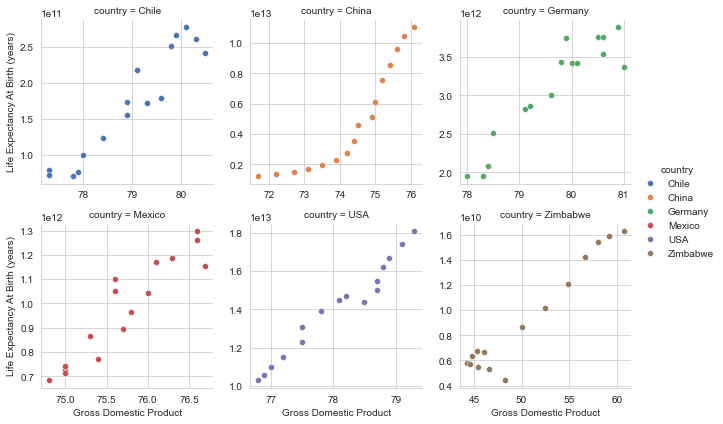

In [94]:
graph = sns.FacetGrid(
    data=data,
    col_wrap=3,
    col='country',
    hue='country',
    sharey=False,
    sharex=False,
    legend_out=True,
    )

graph = (graph.map(sns.scatterplot,"leaby","gdp")
         .add_legend()
         .set_axis_labels("Gross Domestic Product","Life Expectancy At Birth (years)"))
graph

The plots show a positive correlation between GDP and life expectancy for all the countries. United States, Mexico, Chile and Germany have a relatively linear correlation and China seems to have a exponential correlation.

## Conclusion

To sum every thing up, the goal of this analysis was to better understand the variation of GDP and Life expectancy across various countries. WE also tackled the question to see if there was a correlation between the two variables.

It was demonstrated that the life expectancy of all the countries grew over time and the same can be said for the GDP. In all our plots, Zimbabwe always seemed to trail behind. It was not only the poorest country but also the one with the lowest life expectancy. When we looked at the correlation between the two variables, a clear positive correlation appeared. It was event possible to see where the GDP dropped by looking at the life expectancy graphs.

The data used for this analysis did have its limitations though. Infact, we only had access to 6 countries. It would've been interesting to take this analysis further by looking at more contries. This way, we would be more confident in the results obtained.